In [1]:
# Dependencies
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Store filepath in a variable
file = "cmpd_traffic_stops.csv"

In [3]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
file_df = pd.read_csv(file)

In [4]:
data=file_df.iloc[:,0:12]
data.head()

,Month_of_Stop,Reason_for_Stop,Officer_Race,Officer_Gender,Officer_Years_of_Service,Driver_Race,Driver_Ethnicity,Driver_Gender,Driver_Age,Was_a_Search_Conducted,Result_of_Stop,CMPD_Division
0,2017/04,Vehicle Equipment,Asian / Pacific Islander,Male,15,White,Non-Hispanic,Female,40,No,Verbal Warning,South Division
1,2017/04,Speeding,Asian / Pacific Islander,Male,7,White,Non-Hispanic,Male,46,No,Verbal Warning,Providence Division
2,2017/04,Vehicle Regulatory,White,Male,19,White,Non-Hispanic,Male,48,No,Citation Issued,Independence Division
3,2017/04,Speeding,Hispanic/Latino,Male,3,White,Non-Hispanic,Female,54,No,Citation Issued,Providence Division
4,2017/04,Stop Light/Sign,Hispanic/Latino,Female,3,Black,Non-Hispanic,Female,30,No,Verbal Warning,Westover Division


In [34]:
#Map categorical values
#wcdict = {'Yes':1,'No':1}
#data_new = data.applymap(lambda s: wcdict.get(s) if s in wcdict else s)
#data_new.head()
data['Month']=data['Month_of_Stop'].apply(lambda x: int(str(x)[-2:]))
data['Year']=data['Month_of_Stop'].apply(lambda x: int(str(x)[:4]))
data.head()

,Month_of_Stop,Reason_for_Stop,Officer_Race,Officer_Gender,Officer_Years_of_Service,Driver_Race,Driver_Ethnicity,Driver_Gender,Driver_Age,Was_a_Search_Conducted,Result_of_Stop,CMPD_Division,Month,Year
0,2017/04,Vehicle Equipment,Asian / Pacific Islander,Male,15,White,Non-Hispanic,Female,40,No,Verbal Warning,South Division,4,2017
1,2017/04,Speeding,Asian / Pacific Islander,Male,7,White,Non-Hispanic,Male,46,No,Verbal Warning,Providence Division,4,2017
2,2017/04,Vehicle Regulatory,White,Male,19,White,Non-Hispanic,Male,48,No,Citation Issued,Independence Division,4,2017
3,2017/04,Speeding,Hispanic/Latino,Male,3,White,Non-Hispanic,Female,54,No,Citation Issued,Providence Division,4,2017
4,2017/04,Stop Light/Sign,Hispanic/Latino,Female,3,Black,Non-Hispanic,Female,30,No,Verbal Warning,Westover Division,4,2017


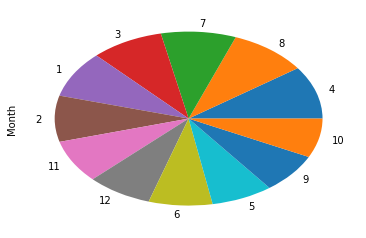

In [52]:
data.Month.value_counts().plot(kind='pie')


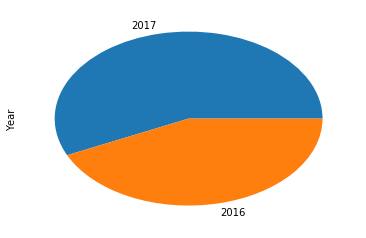

In [51]:
data.Year.value_counts().plot(kind='pie')

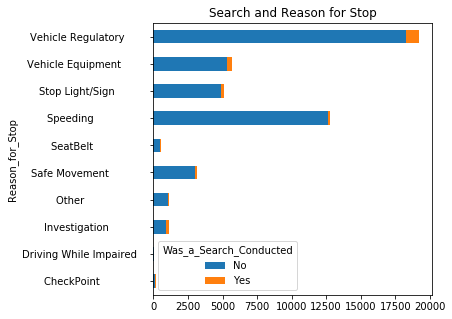

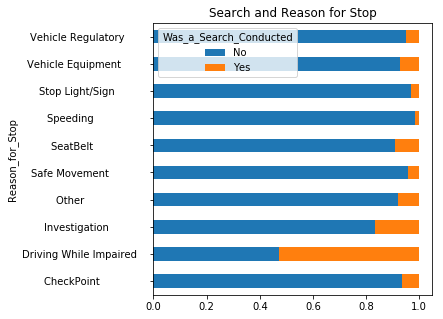

In [6]:
#data[['Reason_for_Stop','Driver_Gender']].pivot_table(index='Reason_for_Stop',columns='Driver_Gender', values='Driver_Gender', aggfunc=np.count_nonzero).plot(kind='bar', stacked=True, figsize=(10,5),rot=30,title="Reason for Stop")
pd.crosstab(data['Reason_for_Stop'],data['Was_a_Search_Conducted']).plot(kind='barh', stacked=True, figsize=(5,5),title="Search and Reason for Stop")
pd.crosstab(data['Reason_for_Stop'],data['Was_a_Search_Conducted'],normalize='index').plot(kind='barh', stacked=True, figsize=(5,5),title="Search and Reason for Stop")

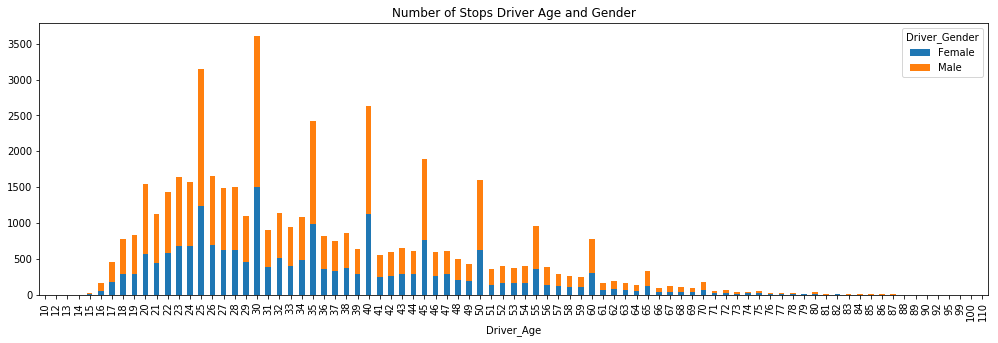

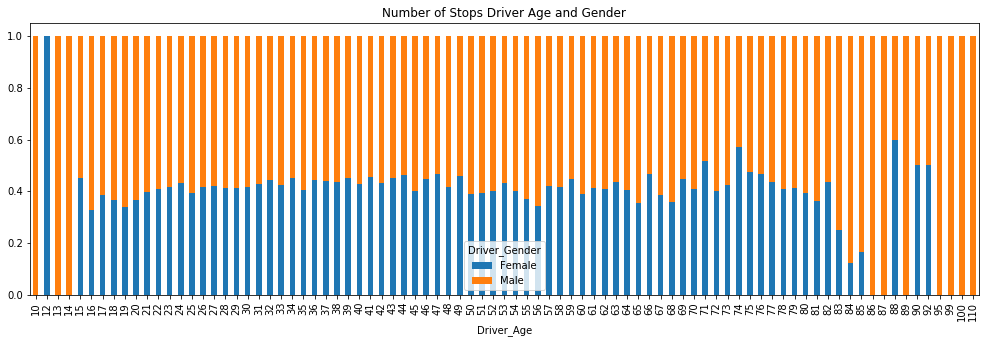

In [40]:
#data[['Driver_Age','Driver_Gender']].pivot_table(index='Driver_Age',columns='Driver_Gender', values='Driver_Gender', aggfunc=np.count_nonzero).plot(kind='bar', stacked=True, figsize=(15,5),rot=90,title="Driver Age and Gender")
pd.crosstab(data['Driver_Age'],data['Driver_Gender']).plot(kind='bar', stacked=True, figsize=(17,5),title="Number of Stops Driver Age and Gender")
pd.crosstab(data['Driver_Age'],data['Driver_Gender'],normalize='index').plot(kind='bar', stacked=True, figsize=(17,5),title="Number of Stops Driver Age and Gender")

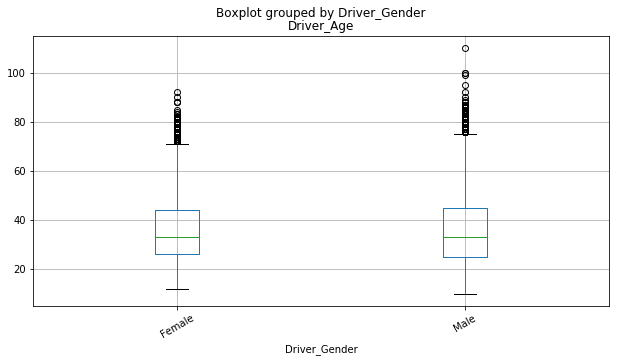

In [8]:
data.boxplot(column='Driver_Age', by='Driver_Gender', rot=30,figsize=(10,5))

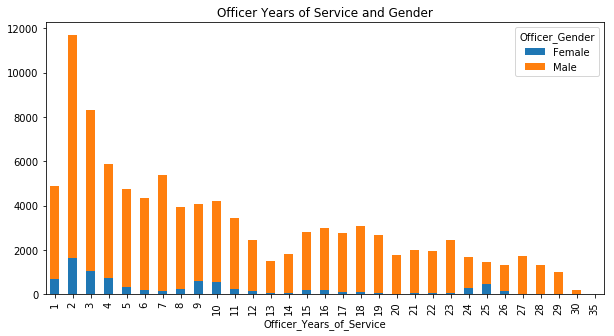

In [9]:
data[['Officer_Years_of_Service','Officer_Gender']].pivot_table(index='Officer_Years_of_Service',columns='Officer_Gender', values='Officer_Gender', aggfunc=np.count_nonzero).plot(kind='bar', stacked=True, figsize=(10,5),rot=90,title='Officer Years of Service and Gender')

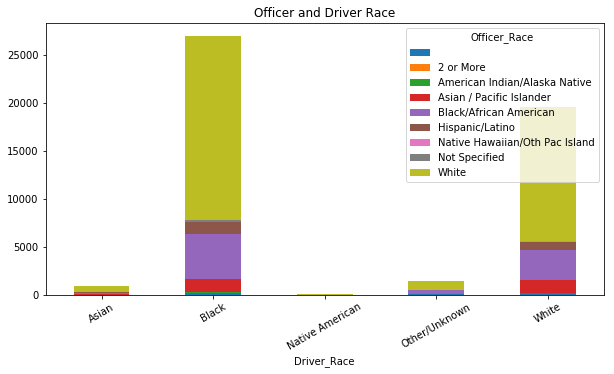

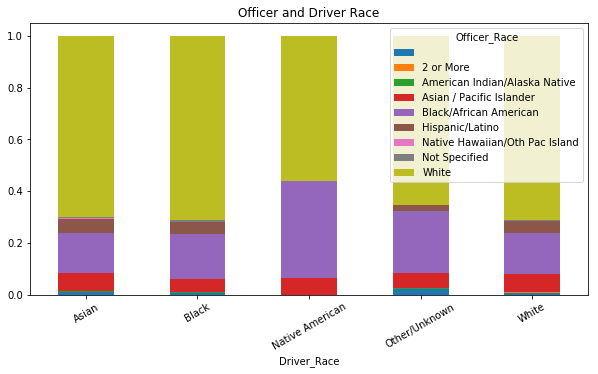

In [10]:
#data[['Officer_Race','Driver_Race']].pivot_table(index='Officer_Race',columns='Driver_Race', values='Driver_Race', aggfunc=np.count_nonzero).plot(kind='bar', stacked=True, figsize=(10,5),rot=30,title="Officer and Driver Race")
pd.crosstab(data['Driver_Race'],data['Officer_Race']).plot(kind='bar', stacked=True, figsize=(10,5),title="Officer and Driver Race",rot=30)
pd.crosstab(data['Driver_Race'],data['Officer_Race'],normalize='index').plot(kind='bar', stacked=True, figsize=(10,5),title="Officer and Driver Race",rot=30)

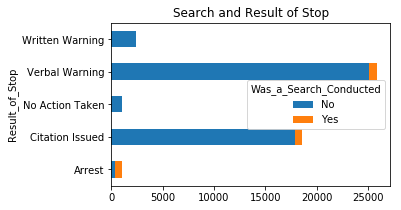

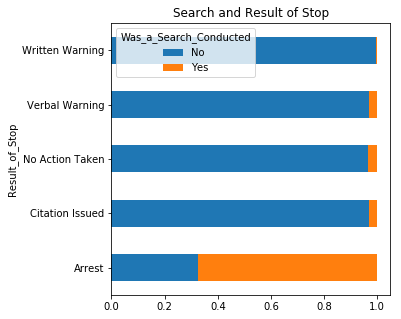

In [42]:
#data[['Result_of_Stop','Was_a_Search_Conducted']].pivot_table(index='Result_of_Stop',columns='Was_a_Search_Conducted', values='Was_a_Search_Conducted', aggfunc=np.count_nonzero).plot(kind='bar', stacked=True, figsize=(10,5),rot=90,title="Search and Result of Stop")
pd.crosstab(data['Result_of_Stop'],data['Was_a_Search_Conducted']).plot(kind='barh', stacked=True, figsize=(5,3),title="Search and Result of Stop")
pd.crosstab(data['Result_of_Stop'],data['Was_a_Search_Conducted'],normalize='index').plot(kind='barh', stacked=True, figsize=(5,5),title="Search and Result of Stop")

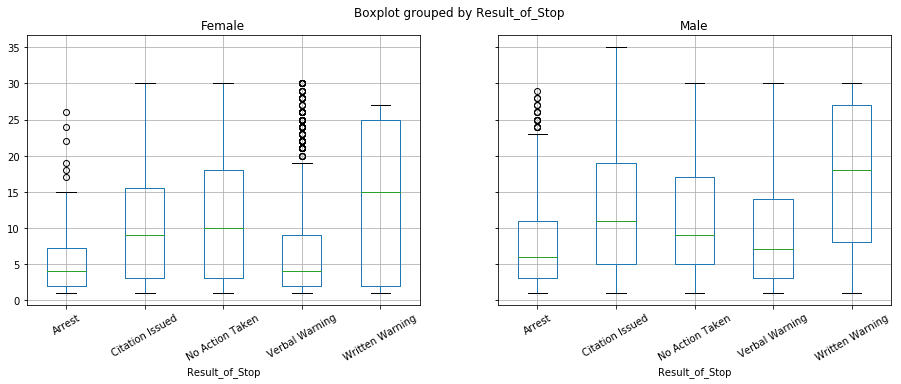

In [12]:
data.groupby('Officer_Gender').boxplot(column='Officer_Years_of_Service', by='Result_of_Stop', rot=30,figsize=(15,5))
plt.show()

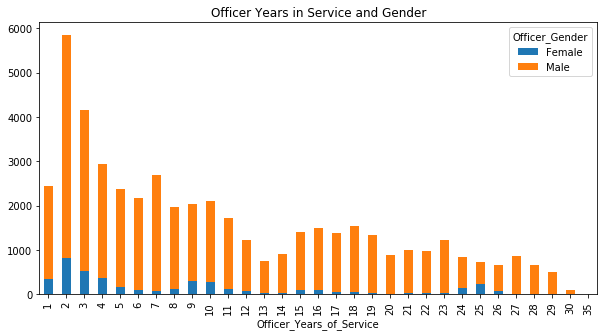

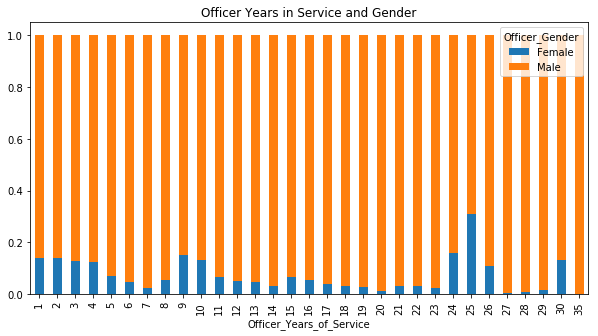

In [13]:
#data[['Officer_Years_of_Service','Result_of_Stop']].pivot_table(index='Officer_Years_of_Service',columns='Result_of_Stop', values='Result_of_Stop', aggfunc=np.count_nonzero).plot(kind='bar', stacked=True, figsize=(10,5),rot=90)
pd.crosstab(data['Officer_Years_of_Service'],data['Officer_Gender']).plot(kind='bar', stacked=True, figsize=(10,5),title="Officer Years in Service and Gender")
pd.crosstab(data['Officer_Years_of_Service'],data['Officer_Gender'],normalize='index').plot(kind='bar', stacked=True, figsize=(10,5),title="Officer Years in Service and Gender")

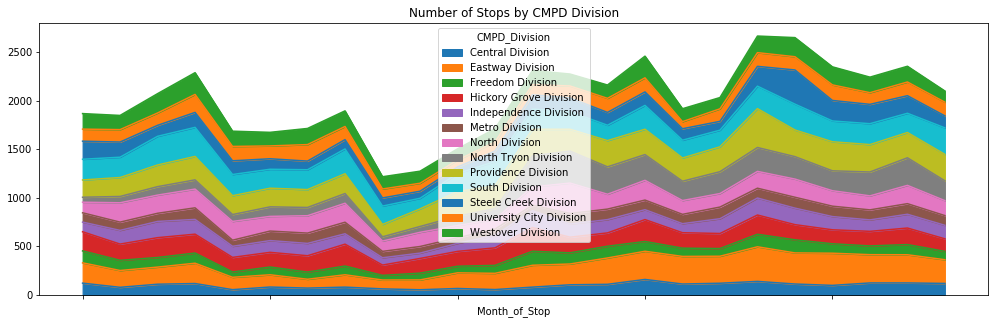

In [30]:
pd.crosstab(data['Month_of_Stop'],data['CMPD_Division']).plot.area(figsize=(17,5),title="Number of Stops by CMPD Division")

In [22]:
data.head()

,Month_of_Stop,Reason_for_Stop,Officer_Race,Officer_Gender,Officer_Years_of_Service,Driver_Race,Driver_Ethnicity,Driver_Gender,Driver_Age,Was_a_Search_Conducted,Result_of_Stop,CMPD_Division,Month
0,2017/04,Vehicle Equipment,Asian / Pacific Islander,Male,15,White,Non-Hispanic,Female,40,No,Verbal Warning,South Division,4
1,2017/04,Speeding,Asian / Pacific Islander,Male,7,White,Non-Hispanic,Male,46,No,Verbal Warning,Providence Division,4
2,2017/04,Vehicle Regulatory,White,Male,19,White,Non-Hispanic,Male,48,No,Citation Issued,Independence Division,4
3,2017/04,Speeding,Hispanic/Latino,Male,3,White,Non-Hispanic,Female,54,No,Citation Issued,Providence Division,4
4,2017/04,Stop Light/Sign,Hispanic/Latino,Female,3,Black,Non-Hispanic,Female,30,No,Verbal Warning,Westover Division,4
